# Exploratory Data Analysis - Bank Marketing Dataset

Initial exploration of the bank marketing dataset for the Kaggle competition.

## Data Loading and Initial Inspection

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# Setup and data loading
plt.style.use('seaborn-v0_8')
sns.set_palette("Set3")
pd.set_option('display.max_columns', None)

train_df = pd.read_csv('../data/raw/train.csv')
test_df = pd.read_csv('../data/raw/test.csv')

print(f"Training set: {train_df.shape}")
print(f"Test set: {test_df.shape}")

Training set: (795211, 18)
Test set: (250000, 17)


In [3]:
# Basic dataset information
print("Dataset overview:")
print(f"Training samples: {train_df.shape[0]:,}")
print(f"Features: {train_df.shape[1] - 1}")
print(f"Target: subscription to term deposit (y)")

print("\nData types:")
print(train_df.dtypes)

print("\nFirst few rows:")
display(train_df.head())

print("\nNumerical summaries:")
display(train_df.describe())

Dataset overview:
Training samples: 795,211
Features: 17
Target: subscription to term deposit (y)

Data types:
id            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

First few rows:


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1



Numerical summaries:


,id,age,balance,day,duration,campaign,pdays,previous,y
count,795211.000000,795211.000000,795211.000000,795211.000000,795211.000000,795211.000000,795211.000000,795211.000000,795211.000000
mean,397605.000000,40.926953,1213.061980,16.099540,256.339096,2.587630,23.423889,0.314566,0.120442
std,229557.786794,10.129098,2848.603881,8.255231,271.723766,2.741838,78.901465,1.410369,0.325478
min,0.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,198802.500000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,397605.000000,39.000000,624.000000,17.000000,135.000000,2.000000,-1.000000,0.000000,0.000000
75%,596407.500000,48.000000,1390.000000,21.000000,347.500000,3.000000,-1.000000,0.000000,0.000000
max,795210.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [4]:
# Check for missing values
missing_data = train_df.isnull().sum()
missing_pct = (missing_data / len(train_df)) * 100

missing_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_pct
}).sort_values('Missing_Count', ascending=False)

print("Missing values analysis:")
display(missing_summary[missing_summary['Missing_Count'] > 0])

if missing_data.sum() == 0:
    print("No missing values found in the dataset.")

Missing values analysis:


,Missing_Count,Missing_Percentage


No missing values found in the dataset.


## Target Variable Distribution

Target variable distribution:
No subscription (0): 699,434 (88.0%)
Subscription (1): 95,777 (12.0%)
Imbalance ratio: 7.3:1


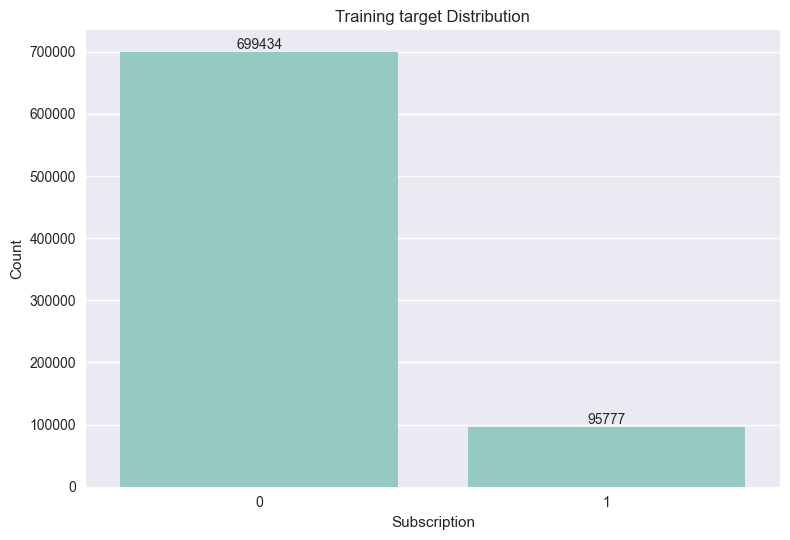

In [5]:
# Examine target distribution
target_counts = train_df['y'].value_counts()
target_pct = train_df['y'].value_counts(normalize=True) * 100

print("Target variable distribution:")
print(f"No subscription (0): {target_counts[0]:,} ({target_pct[0]:.1f}%)")
print(f"Subscription (1): {target_counts[1]:,} ({target_pct[1]:.1f}%)")
print(f"Imbalance ratio: {target_counts[0] / target_counts[1]:.1f}:1")

# Visualization
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax = sns.countplot(data=train_df, x='y')
plt.title('Training target Distribution')
plt.xlabel('Subscription')
plt.ylabel('Count')

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.tight_layout()
plt.savefig('../docs/docs/images/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## Feature Analysis

In [6]:
# Categorize features for analysis
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

print(f"Categorical features: {len(categorical_features)}")
print(f"Numerical features: {len(numerical_features)}")

# Check unique values in categorical features
print("\nCategorical feature cardinality:")
for col in categorical_features:
    unique_vals = train_df[col].nunique()
    top_category = train_df[col].mode().iloc[0]
    print(f"{col}: {unique_vals} categories (most common: {top_category})")

Categorical features: 9
Numerical features: 7

Categorical feature cardinality:
job: 12 categories (most common: management)
marital: 3 categories (most common: married)
education: 4 categories (most common: secondary)
default: 2 categories (most common: no)
housing: 2 categories (most common: yes)
loan: 2 categories (most common: no)
contact: 3 categories (most common: cellular)
month: 12 categories (most common: may)
poutcome: 4 categories (most common: unknown)


### Categorical Feature Distributions

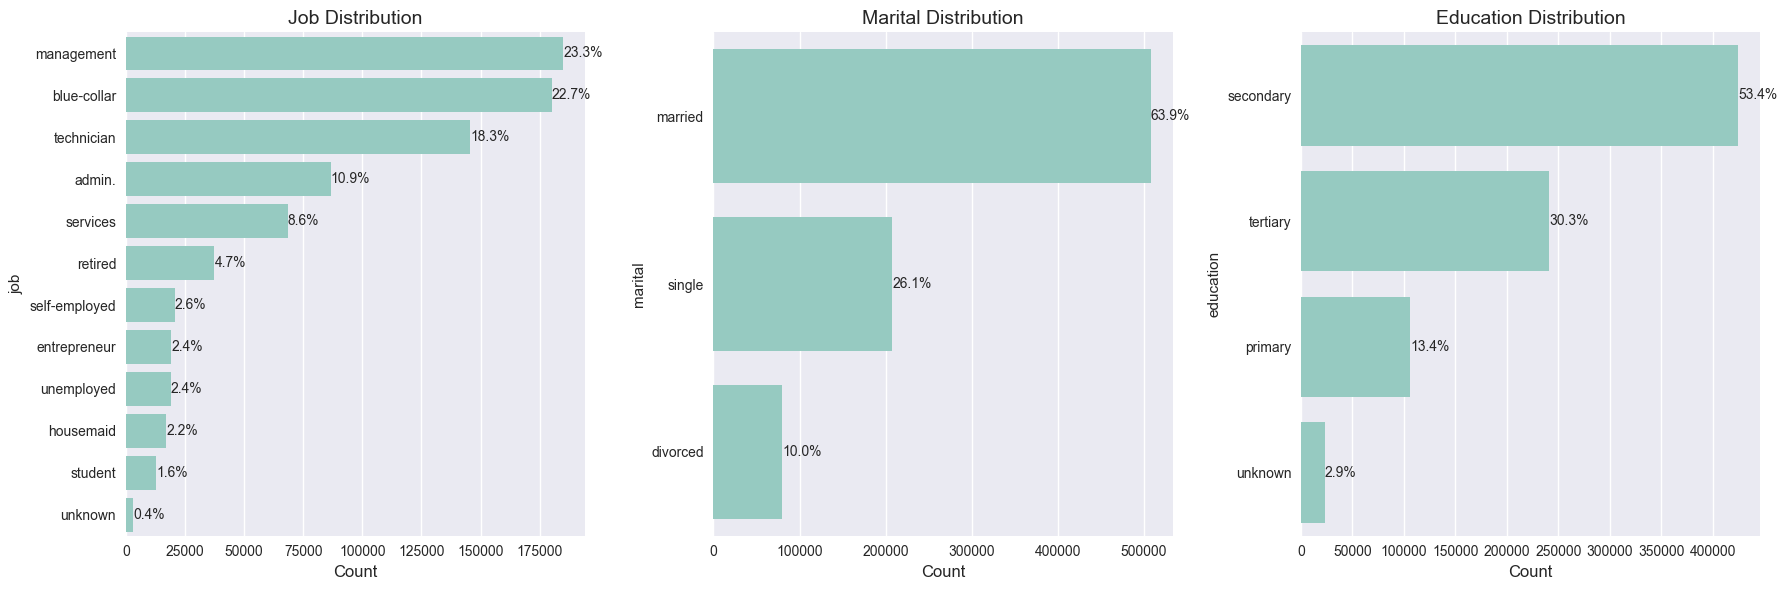

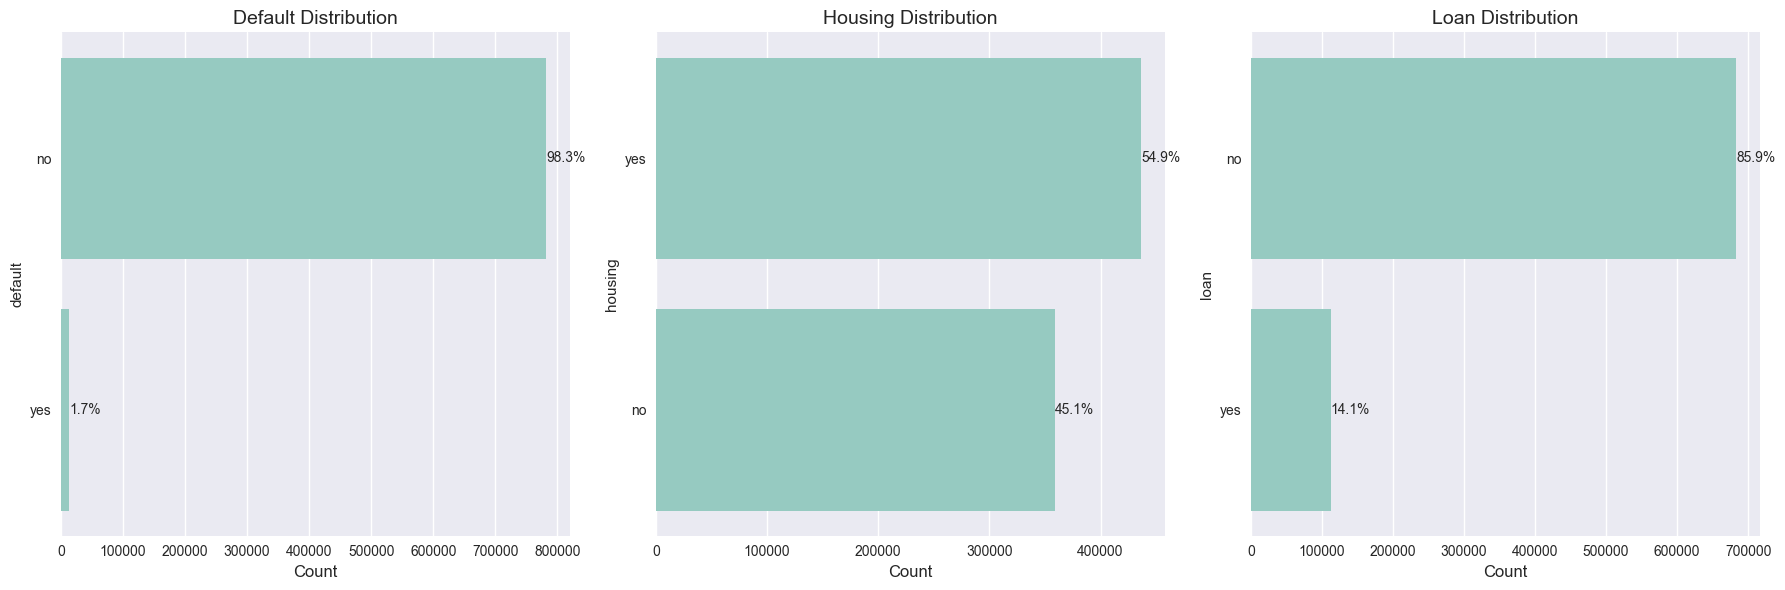

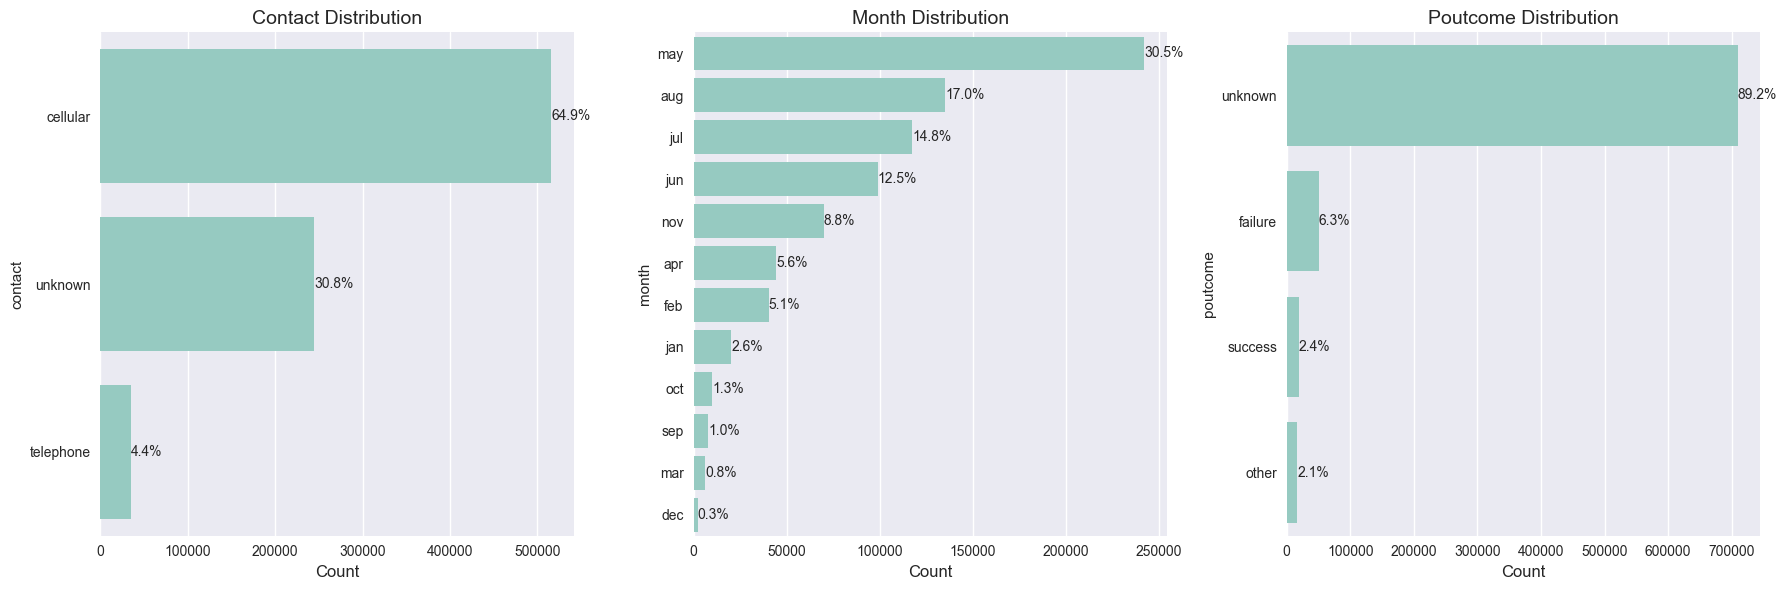

In [7]:
# Distribution of categorical features - split into multiple readable figures

# First batch: Job, Marital, Education
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
cols_batch1 = ['job', 'marital', 'education']

for i, col in enumerate(cols_batch1):
    value_counts = train_df[col].value_counts()
    sns.countplot(data=train_df, y=col, ax=axes[i], order=value_counts.index)
    axes[i].set_title(f'{col.title()} Distribution', fontsize=14)
    axes[i].set_xlabel('Count', fontsize=12)
    axes[i].tick_params(labelsize=10)
    
    # Add percentage annotations
    total = len(train_df)
    for p in axes[i].patches:
        pct = f'{100 * p.get_width() / total:.1f}%'
        axes[i].annotate(pct, (p.get_width(), p.get_y() + p.get_height()/2), 
                        ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('../docs/docs/images/categorical_distributions_1.png', dpi=300, bbox_inches='tight')
plt.show()

# Second batch: Default, Housing, Loan
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
cols_batch2 = ['default', 'housing', 'loan']

for i, col in enumerate(cols_batch2):
    value_counts = train_df[col].value_counts()
    sns.countplot(data=train_df, y=col, ax=axes[i], order=value_counts.index)
    axes[i].set_title(f'{col.title()} Distribution', fontsize=14)
    axes[i].set_xlabel('Count', fontsize=12)
    axes[i].tick_params(labelsize=10)
    
    # Add percentage annotations
    total = len(train_df)
    for p in axes[i].patches:
        pct = f'{100 * p.get_width() / total:.1f}%'
        axes[i].annotate(pct, (p.get_width(), p.get_y() + p.get_height()/2), 
                        ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('../docs/docs/images/categorical_distributions_2.png', dpi=300, bbox_inches='tight')
plt.show()

# Third batch: Contact, Month, Poutcome
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
cols_batch3 = ['contact', 'month', 'poutcome']

for i, col in enumerate(cols_batch3):
    value_counts = train_df[col].value_counts()
    sns.countplot(data=train_df, y=col, ax=axes[i], order=value_counts.index)
    axes[i].set_title(f'{col.title()} Distribution', fontsize=14)
    axes[i].set_xlabel('Count', fontsize=12)
    axes[i].tick_params(labelsize=10)
    
    # Add percentage annotations
    total = len(train_df)
    for p in axes[i].patches:
        pct = f'{100 * p.get_width() / total:.1f}%'
        axes[i].annotate(pct, (p.get_width(), p.get_y() + p.get_height()/2), 
                        ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('../docs/docs/images/categorical_distributions_3.png', dpi=300, bbox_inches='tight')
plt.show()

### Numerical Feature Distributions

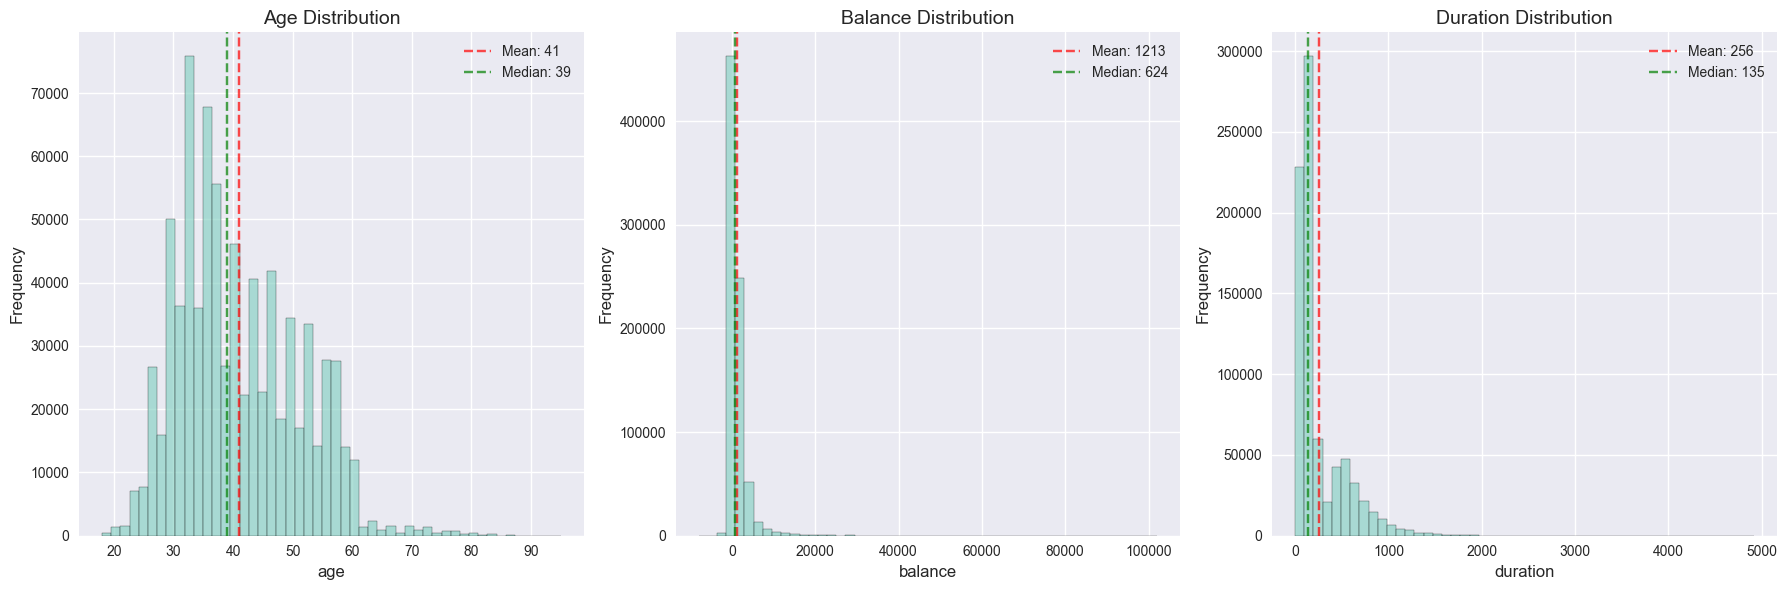

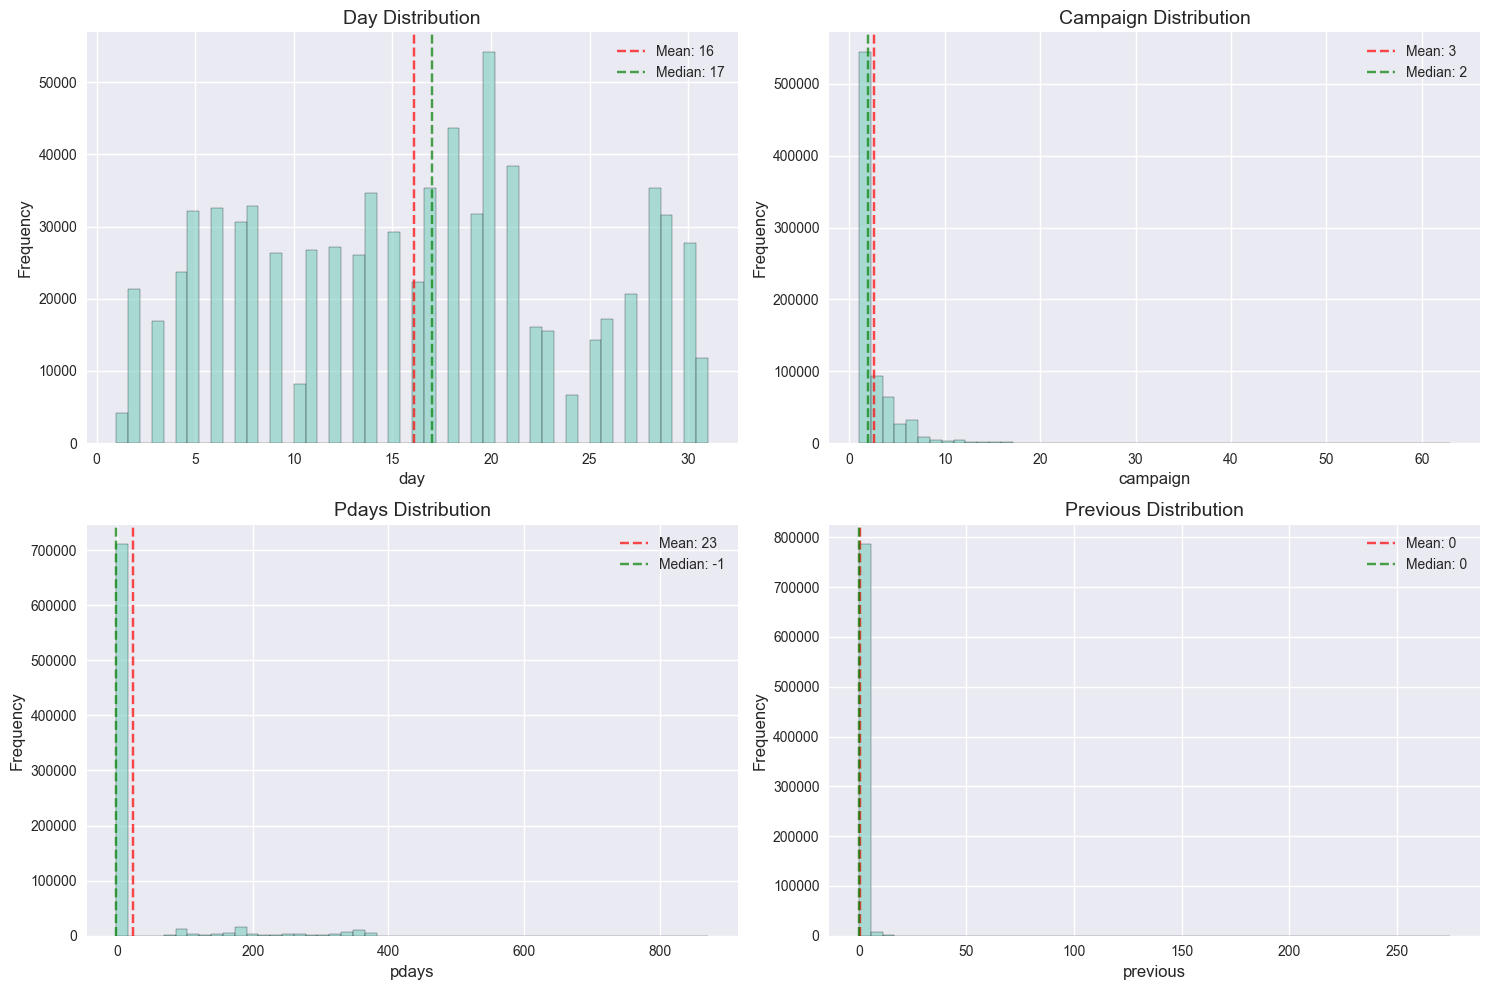

In [8]:
# Distribution analysis for numerical features - split into readable figures

# First batch: Age, Balance, Duration
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
cols_batch1 = ['age', 'balance', 'duration']

for i, col in enumerate(cols_batch1):
    axes[i].hist(train_df[col], bins=50, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{col.title()} Distribution', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].tick_params(labelsize=10)
    
    # Add mean and median lines
    mean_val = train_df[col].mean()
    median_val = train_df[col].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.0f}')
    axes[i].axvline(median_val, color='green', linestyle='--', alpha=0.7, label=f'Median: {median_val:.0f}')
    axes[i].legend(fontsize=10)

plt.tight_layout()
plt.savefig('../docs/docs/images/numerical_distributions_1.png', dpi=300, bbox_inches='tight')
plt.show()

# Second batch: Day, Campaign, Pdays, Previous
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()
cols_batch2 = ['day', 'campaign', 'pdays', 'previous']

for i, col in enumerate(cols_batch2):
    axes[i].hist(train_df[col], bins=50, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{col.title()} Distribution', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].tick_params(labelsize=10)
    
    # Add mean and median lines
    mean_val = train_df[col].mean()
    median_val = train_df[col].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.0f}')
    axes[i].axvline(median_val, color='green', linestyle='--', alpha=0.7, label=f'Median: {median_val:.0f}')
    axes[i].legend(fontsize=10)

plt.tight_layout()
plt.savefig('../docs/docs/images/numerical_distributions_2.png', dpi=300, bbox_inches='tight')
plt.show()

## Relationship with Target Variable

### Categorical Features vs Target

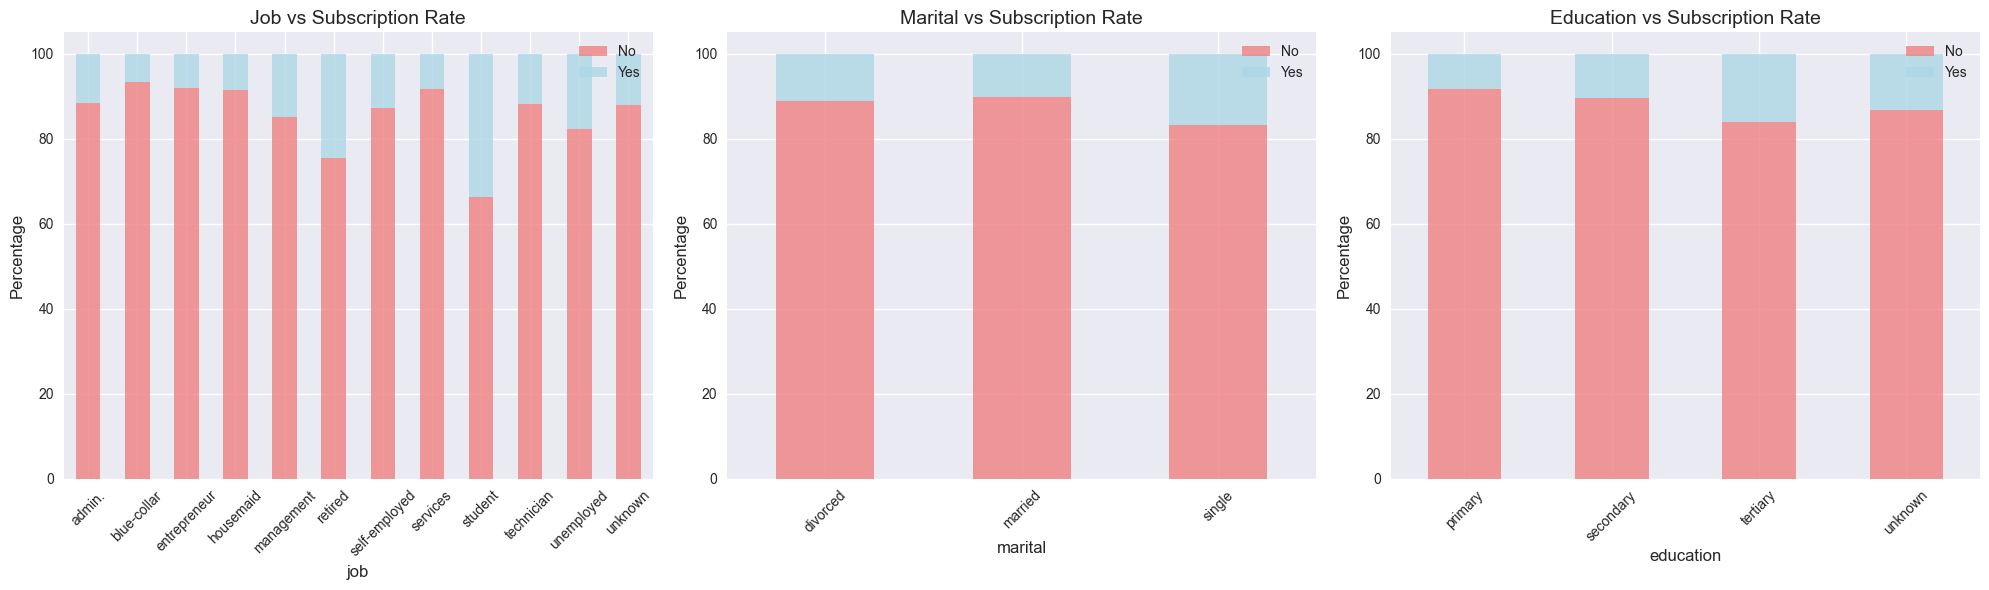

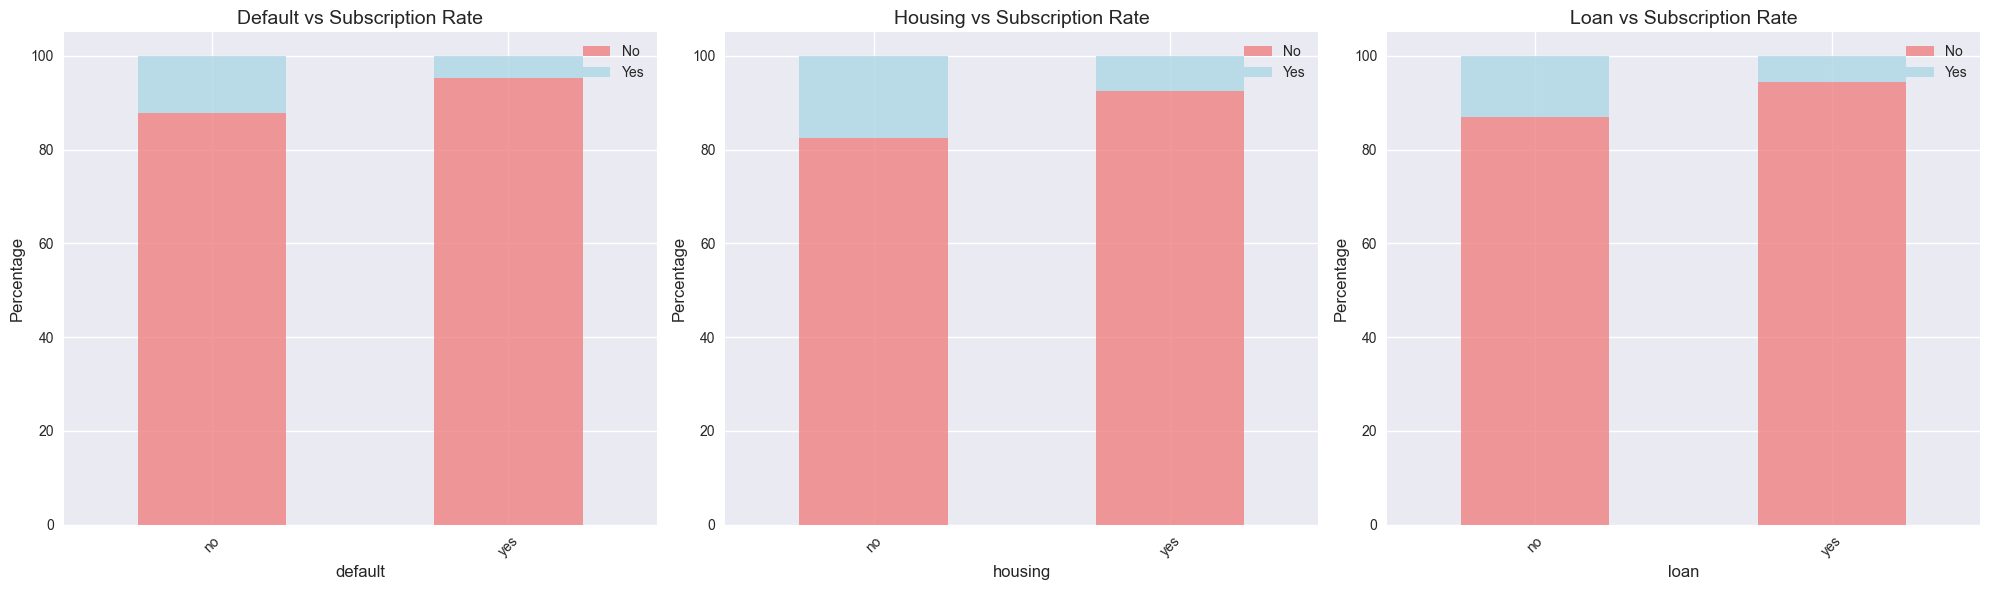

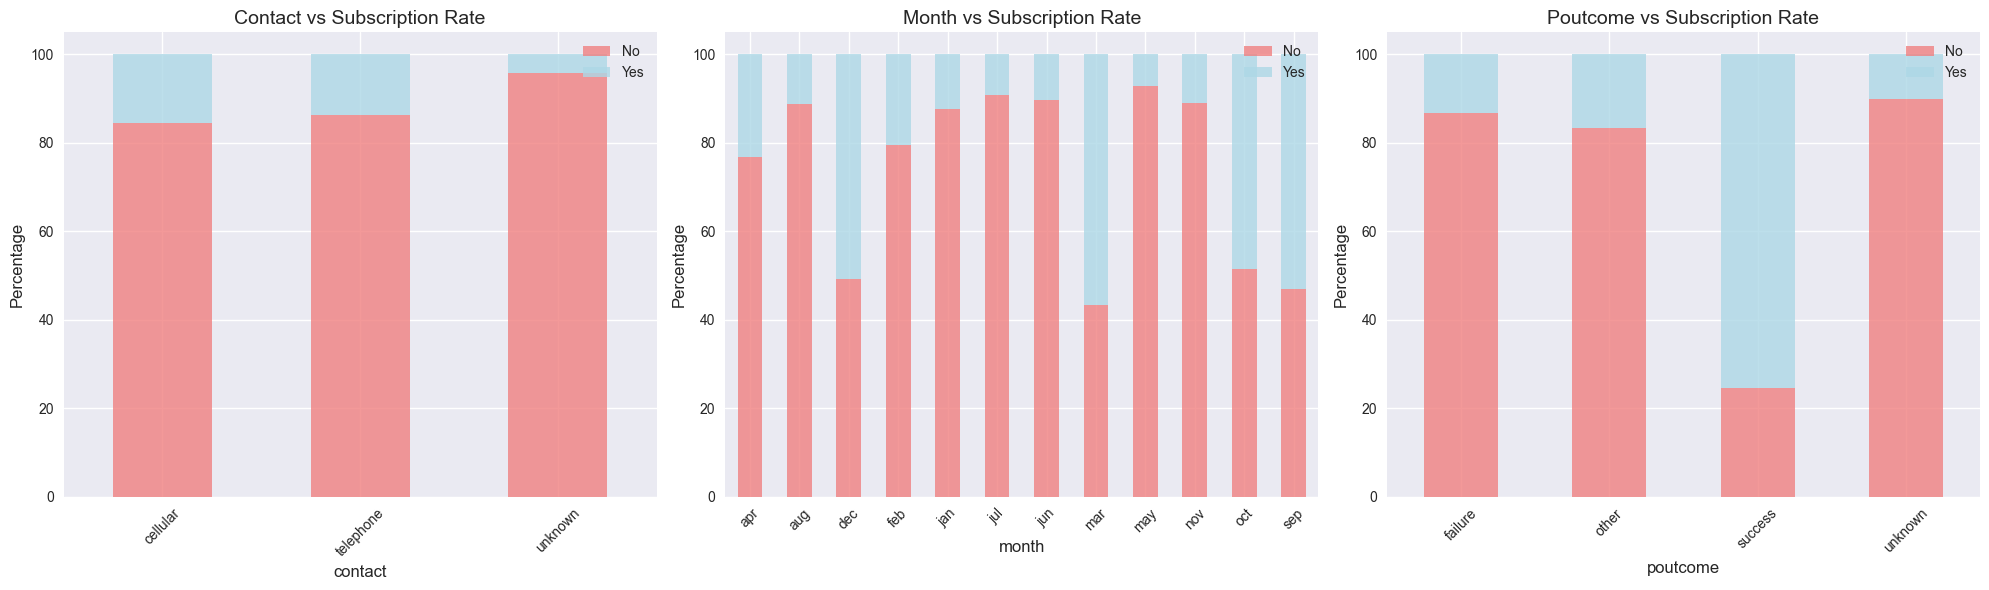

Subscription rates by category:

job:


,Count,Sub_Rate
job,,
student,12705,0.3368
retired,37449,0.2451
unemployed,18937,0.1781
management,184999,0.1497
self-employed,20599,0.1286



marital:


,Count,Sub_Rate
marital,,
single,207624,0.1692
divorced,79614,0.1121
married,507973,0.1018



education:


,Count,Sub_Rate
education,,
tertiary,240809,0.1620
unknown,23156,0.1336
secondary,424885,0.1055
primary,106361,0.0833



default:


,Count,Sub_Rate
default,,
no,781547,0.1217
yes,13664,0.0474



housing:


,Count,Sub_Rate
housing,,
no,358793,0.1753
yes,436418,0.0754



loan:


,Count,Sub_Rate
loan,,
no,682990,0.1311
yes,112221,0.0555



contact:


,Count,Sub_Rate
contact,,
cellular,515940,0.1562
telephone,34624,0.1366
unknown,244647,0.0428



month:


,Count,Sub_Rate
month,,
mar,6279,0.5674
sep,7988,0.5297
dec,2283,0.5090
oct,9942,0.4861
apr,44251,0.2331



poutcome:


,Count,Sub_Rate
poutcome,,
success,19202,0.7548
other,16584,0.1668
failure,50016,0.1321
unknown,709409,0.1014


In [9]:
# Subscription rates across categorical features - split into readable figures

# First batch: Job, Marital, Education
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
cols_batch1 = ['job', 'marital', 'education']

for i, col in enumerate(cols_batch1):
    ct = pd.crosstab(train_df[col], train_df['y'], normalize='index') * 100
    
    ct.plot(kind='bar', stacked=True, ax=axes[i], 
            color=['lightcoral', 'lightblue'], alpha=0.8)
    axes[i].set_title(f'{col.title()} vs Subscription Rate', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Percentage', fontsize=12)
    axes[i].legend(['No', 'Yes'], loc='upper right', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)

plt.tight_layout()
plt.savefig('../docs/docs/images/categorical_vs_target_1.png', dpi=300, bbox_inches='tight')
plt.show()

# Second batch: Default, Housing, Loan
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
cols_batch2 = ['default', 'housing', 'loan']

for i, col in enumerate(cols_batch2):
    ct = pd.crosstab(train_df[col], train_df['y'], normalize='index') * 100
    
    ct.plot(kind='bar', stacked=True, ax=axes[i], 
            color=['lightcoral', 'lightblue'], alpha=0.8)
    axes[i].set_title(f'{col.title()} vs Subscription Rate', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Percentage', fontsize=12)
    axes[i].legend(['No', 'Yes'], loc='upper right', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)

plt.tight_layout()
plt.savefig('../docs/docs/images/categorical_vs_target_2.png', dpi=300, bbox_inches='tight')
plt.show()

# Third batch: Contact, Month, Poutcome
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
cols_batch3 = ['contact', 'month', 'poutcome']

for i, col in enumerate(cols_batch3):
    ct = pd.crosstab(train_df[col], train_df['y'], normalize='index') * 100
    
    ct.plot(kind='bar', stacked=True, ax=axes[i], 
            color=['lightcoral', 'lightblue'], alpha=0.8)
    axes[i].set_title(f'{col.title()} vs Subscription Rate', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Percentage', fontsize=12)
    axes[i].legend(['No', 'Yes'], loc='upper right', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)

plt.tight_layout()
plt.savefig('../docs/docs/images/categorical_vs_target_3.png', dpi=300, bbox_inches='tight')
plt.show()

# Detailed subscription rates
print("Subscription rates by category:")
for col in categorical_features:
    print(f"\n{col}:")
    rates = train_df.groupby(col)['y'].agg(['count', 'mean']).round(4)
    rates.columns = ['Count', 'Sub_Rate']
    rates = rates.sort_values('Sub_Rate', ascending=False)
    display(rates.head())

### Numerical Features vs Target

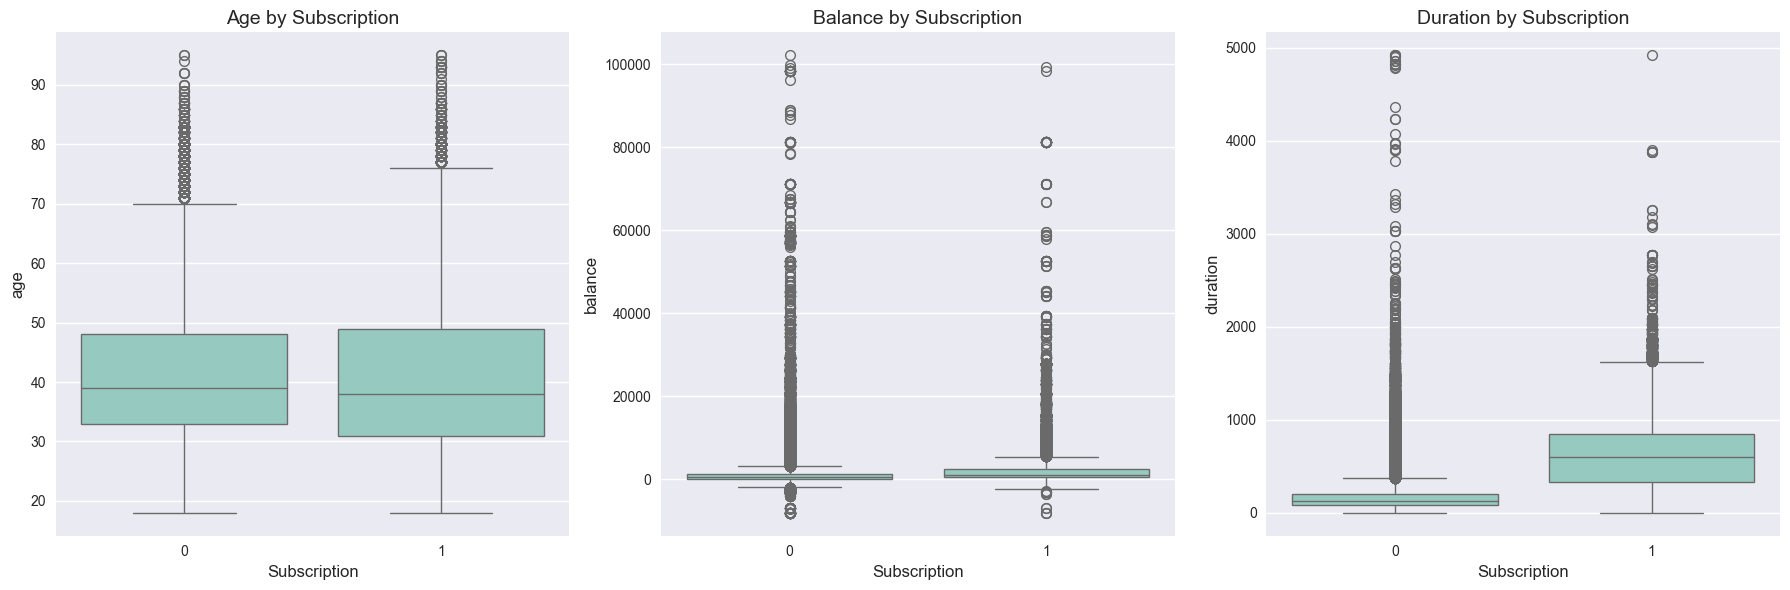

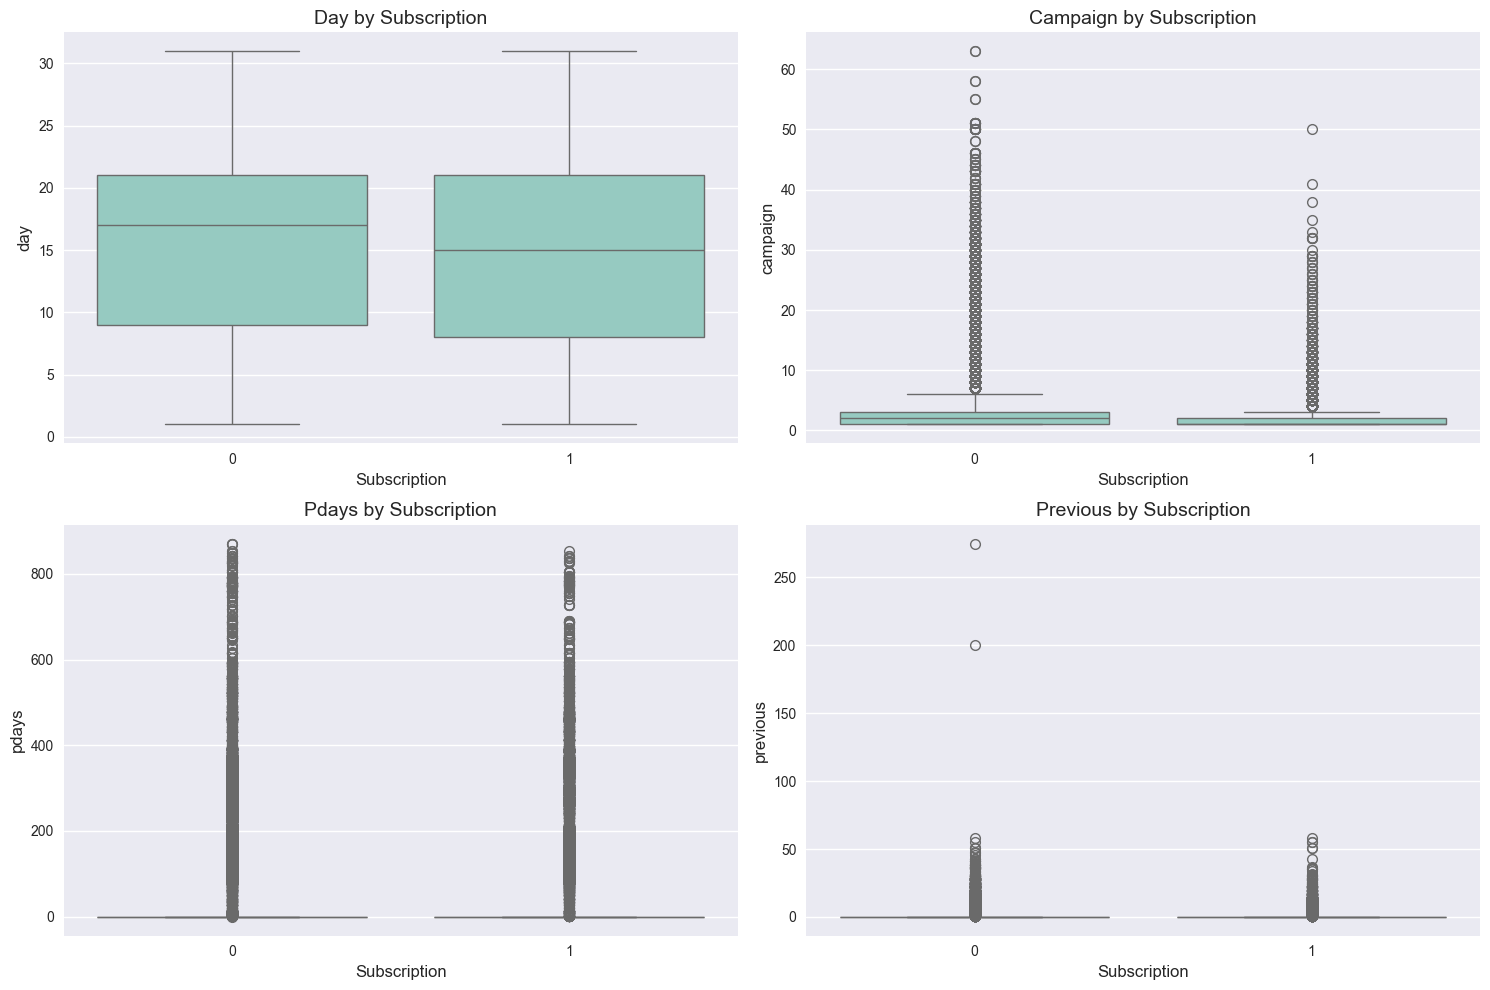

Numerical features by target class:

age:


,mean,median,std
No Subscription,40.89,39.0,9.71
Subscription,41.21,38.0,12.75



balance:


,mean,median,std
No Subscription,1088.40,579.0,2685.03
Subscription,2123.45,1101.0,3712.46



day:


,mean,median,std
No Subscription,16.25,17.0,8.21
Subscription,15.02,15.0,8.52



duration:


,mean,median,std
No Subscription,204.80,124.0,210.96
Subscription,632.75,595.0,356.28



campaign:


,mean,median,std
No Subscription,2.66,2.0,2.84
Subscription,2.03,1.0,1.79



pdays:


,mean,median,std
No Subscription,20.80,-1.0,76.66
Subscription,42.58,-1.0,91.38



previous:


,mean,median,std
No Subscription,0.25,0.0,1.31
Subscription,0.75,0.0,1.95


In [10]:
# Compare numerical features between target classes - split into readable figures

# First batch: Age, Balance, Duration
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
cols_batch1 = ['age', 'balance', 'duration']

for i, col in enumerate(cols_batch1):
    sns.boxplot(data=train_df, x='y', y=col, ax=axes[i])
    axes[i].set_title(f'{col.title()} by Subscription', fontsize=14)
    axes[i].set_xlabel('Subscription', fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].tick_params(labelsize=10)

plt.tight_layout()
plt.savefig('../docs/docs/images/numerical_vs_target_1.png', dpi=300, bbox_inches='tight')
plt.show()

# Second batch: Day, Campaign, Pdays, Previous
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()
cols_batch2 = ['day', 'campaign', 'pdays', 'previous']

for i, col in enumerate(cols_batch2):
    sns.boxplot(data=train_df, x='y', y=col, ax=axes[i])
    axes[i].set_title(f'{col.title()} by Subscription', fontsize=14)
    axes[i].set_xlabel('Subscription', fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].tick_params(labelsize=10)

plt.tight_layout()
plt.savefig('../docs/docs/images/numerical_vs_target_2.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical summary by target
print("Numerical features by target class:")
for col in numerical_features:
    print(f"\n{col}:")
    stats = train_df.groupby('y')[col].agg(['mean', 'median', 'std']).round(2)
    stats.index = ['No Subscription', 'Subscription']
    display(stats)

## Feature Correlations

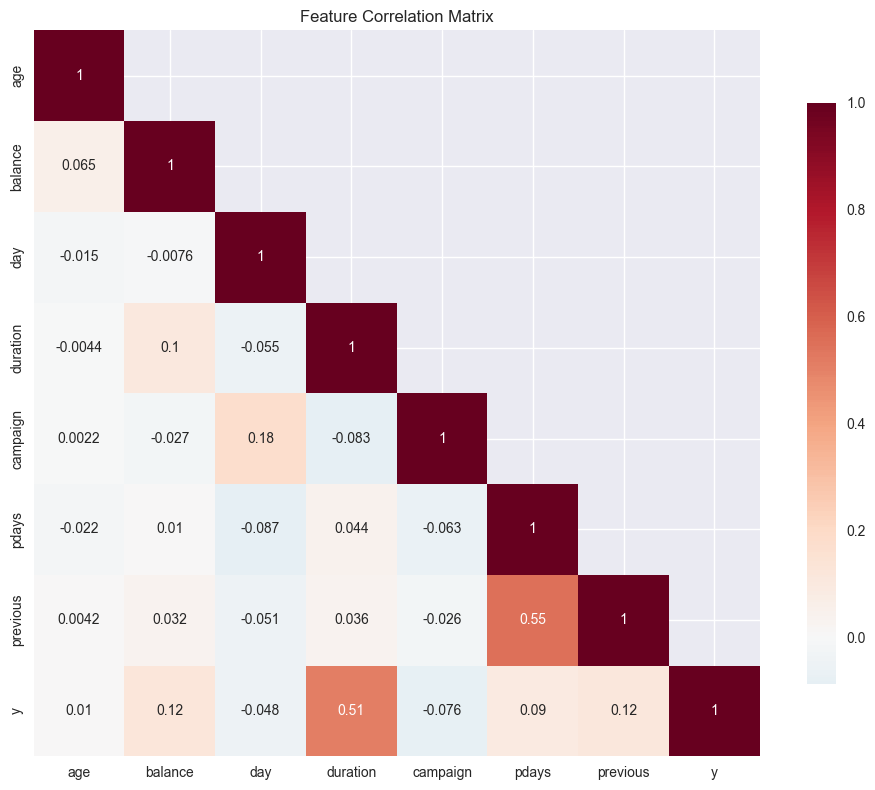

Correlations with target variable:
duration: 0.5126
balance: 0.1183
previous: 0.1153
pdays: 0.0898
campaign: -0.0756
day: -0.0484
age: 0.0104


In [11]:
# Correlation analysis
numerical_cols = numerical_features + ['y']
corr_matrix = train_df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(corr_matrix, k=1)
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, mask=mask, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('../docs/docs/images/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Target correlations
print("Correlations with target variable:")
target_corrs = corr_matrix['y'].drop('y').sort_values(key=abs, ascending=False)
for feature, corr in target_corrs.items():
    print(f"{feature}: {corr:.4f}")

## Summary of Findings

In [12]:
# Key findings from the analysis
print("Dataset characteristics:")
print(f"- {train_df.shape[0]:,} training samples with {train_df.shape[1]-1} features")
print(f"- Target class distribution: {train_df['y'].value_counts()[0]:,} no subscription, {train_df['y'].value_counts()[1]:,} subscription")
print(f"- Imbalanced classes with {train_df['y'].value_counts()[0]/train_df['y'].value_counts()[1]:.1f}:1 ratio")
print("- No missing values in the dataset")

print("\nImportant feature insights:")

# Find strongest correlations
strongest_corr = corr_matrix['y'].drop('y').abs().idxmax()
strongest_val = corr_matrix['y'][strongest_corr]
print(f"- Strongest target correlation: {strongest_corr} ({strongest_val:.3f})")

# Find categories with high subscription rates
high_sub_categories = []
for col in categorical_features:
    rates = train_df.groupby(col)['y'].mean()
    max_rate = rates.max()
    if max_rate > 0.2:  # Above 20% subscription rate
        max_category = rates.idxmax()
        high_sub_categories.append((col, max_category, max_rate))

if high_sub_categories:
    print("- High subscription rate categories:")
    for col, cat, rate in sorted(high_sub_categories, key=lambda x: x[2], reverse=True):
        print(f"  {col} = {cat}: {rate*100:.1f}%")

print("\nData quality observations:")
print("- 'pdays' has many -1 values (likely indicating no previous contact)")
print("- Some extreme values in 'balance' and 'duration' features") 
print("- All categorical features are properly encoded as strings")

print("\nModeling considerations:")
print("- Class imbalance will need to be addressed")
print("- Feature engineering opportunities with 'pdays' variable")
print("- Consider outlier treatment for numerical features")
print("- Strong predictive signal from call duration and previous campaign results")

Dataset characteristics:
- 795,211 training samples with 17 features
- Target class distribution: 699,434 no subscription, 95,777 subscription
- Imbalanced classes with 7.3:1 ratio
- No missing values in the dataset

Important feature insights:
- Strongest target correlation: duration (0.513)
- High subscription rate categories:
  poutcome = success: 75.5%
  month = mar: 56.7%
  job = student: 33.7%

Data quality observations:
- 'pdays' has many -1 values (likely indicating no previous contact)
- Some extreme values in 'balance' and 'duration' features
- All categorical features are properly encoded as strings

Modeling considerations:
- Class imbalance will need to be addressed
- Feature engineering opportunities with 'pdays' variable
- Consider outlier treatment for numerical features
- Strong predictive signal from call duration and previous campaign results
